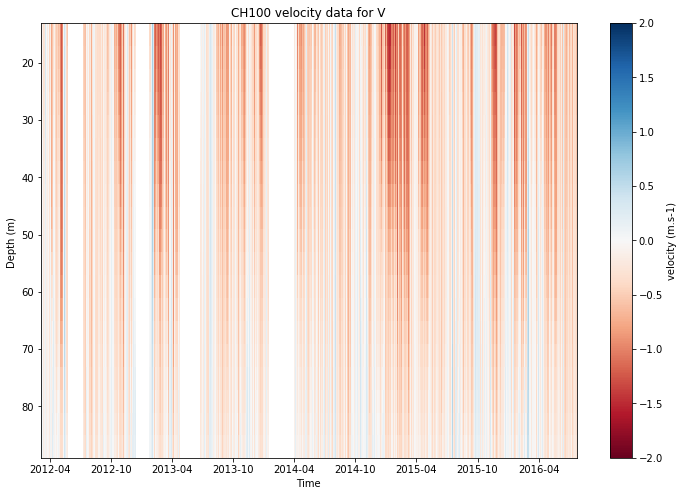

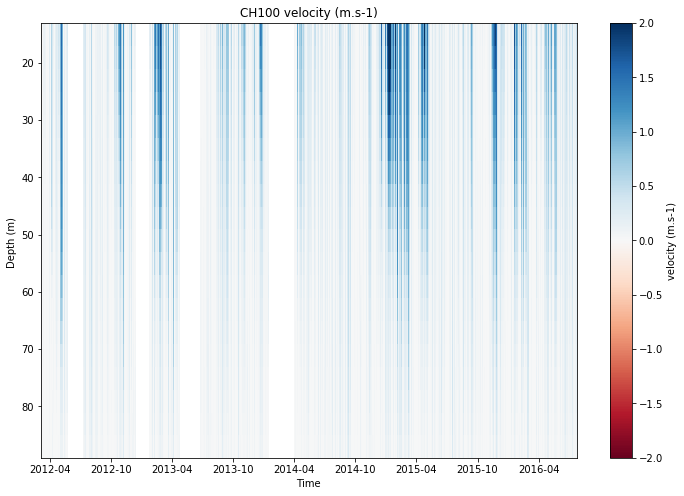

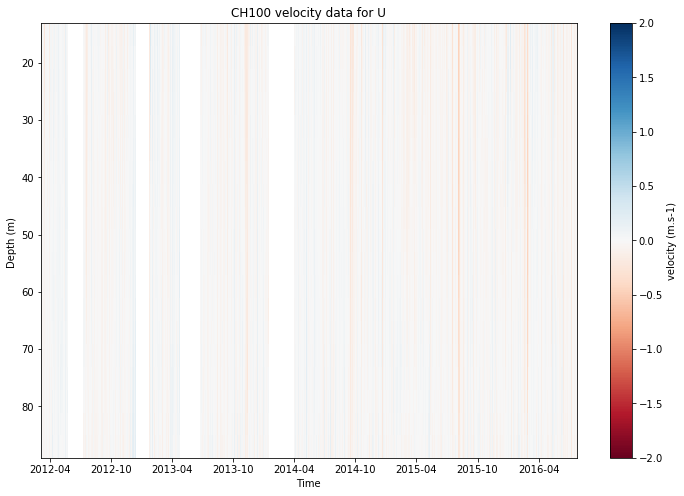

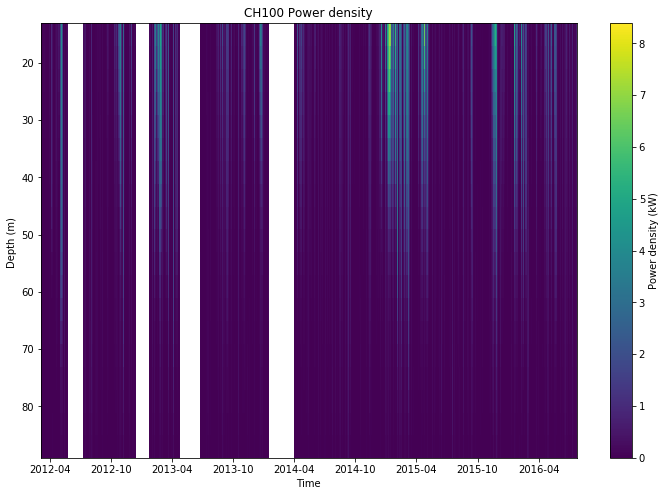

In [3]:
%matplotlib inline
import scipy.io as sio
import matplotlib.pyplot as plt
import numpy as np
from math import sqrt 

data = sio.loadmat('/media/z3525831/Transcend/UNSW/DATA ADCP/CH100_nostructure.mat')

data_U = data['U']
data_V = data['V']
data_depthV = data['depthV']
data_t = data['t']
data_timeDV = data['timeDV']                      # We must define variables for each list key in the "data"                     
data_u25 = data['u25']                            # dictionary in order to be able to exploit them.
data_u55 = data['u55']
data_u90 = data['u90']
data_v25 = data['v25']
data_v55 = data['v55']
data_v90 = data['v90']


import datetime as dt
def matlab2datetime(matlab_datenum):
    day = dt.datetime.fromordinal(int(matlab_datenum))                       # Conversion of Matlab time data to  
    dayfrac = dt.timedelta(days=matlab_datenum%1) - dt.timedelta(days = 366) #'classic python time data.
    return day + dayfrac
t = data_t[0,:]
# convert Matlab variable "t" into list of python datetime objects.
py_t = [matlab2datetime(tval) for tval in t]

# Creation of the variable P (Power density of the current).
V = (data_U*data_U) + (data_V*data_V)
Vf = np.sqrt(V)                        
P = 0.5 * 1025 * 4 * (Vf*Vf*Vf)     # So P = 1/2 * 1025 * 4 * Vf^3.
Pf = P/1000                         # Converting unit W to kW for power

plt.rcParams['figure.figsize'] = (12,8)
t = data_t[0,:]                  # Define the variable t (time) with the right size.              
plt.xlabel("Time")             
plt.ylabel("Depth (m) ")         # Label definition for each axis and the title of the graph.
plt.gca().invert_yaxis()         # Invert the y (depth) axis to get the surface up.
plt.title("CH100 velocity data for V")
plt.pcolor(py_t,data_depthV[:,0],data_V, cmap='RdBu', vmin=-2, vmax=2) #define the variable uses; the colour; the min and max of the axis
clb = plt.colorbar()                 
clb.set_label('velocity (m.s-1)')    # Line to give a label to the color bar.
plt.show()  



plt.rcParams['figure.figsize'] = (12,8)
t = data_t[0,:]                  # Define the variable t (time) with the right size.              
plt.xlabel("Time")             
plt.ylabel("Depth (m) ")         # Label definition for each axis and the title of the graph.
plt.gca().invert_yaxis()         # Invert the y (depth) axis to get the surface up.
plt.title("CH100 velocity (m.s-1)")
plt.pcolor(py_t,data_depthV[:,0],V, cmap='RdBu', vmin=-2, vmax=2) #define the variable uses; the colour; the min and max of the axis
clb = plt.colorbar()                 
clb.set_label('velocity (m.s-1)')    # Line to give a label to the color bar.
plt.show()  



# Same line but with different variable used.

plt.rcParams['figure.figsize'] = (12,8)
t = data_t[0,:]                                
plt.xlabel("Time")             
plt.ylabel("Depth (m) ")
plt.gca().invert_yaxis()
plt.title("CH100 velocity data for U")
plt.pcolor(py_t,data_depthV[:,0],data_U, cmap='RdBu', vmin=-2, vmax=2)
clb = plt.colorbar()
clb.set_label('velocity (m.s-1)')
plt.show() 

plt.rcParams['figure.figsize'] = (12,8)
t = data_t[0,:]                # Define the variable t (time) with the right size.                            
plt.xlabel("Time")             # Label definition for each axis and the title of the graph.  
plt.ylabel("Depth (m) ")
plt.gca().invert_yaxis()       # Invert the y (depth) axis to get the surface up.
plt.title("CH100 Power density")
plt.pcolor(py_t,data_depthV[:,0],Pf)    #define the variable uses
clb = plt.colorbar()
clb.set_label('Power density (kW)')      #define the colorbar label
plt.show()



